# Araba Fiyat Tahmin Çalışması

## Kütüphaneler Çağırılır

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [80]:
dff=pd.read_csv("CarPrice.csv")
dff.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dff.shape

(205, 26)

## Veri Yüzeysel Analiz Edilir

In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
dff.select_dtypes(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [12]:
dff["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
dff["CarName"].nunique()

147

In [14]:
dff.select_dtypes(include="int64")

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,3,2548,130,111,5000,21,27
1,2,3,2548,130,111,5000,21,27
2,3,1,2823,152,154,5000,19,26
3,4,2,2337,109,102,5500,24,30
4,5,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...,...
200,201,-1,2952,141,114,5400,23,28
201,202,-1,3049,141,160,5300,19,25
202,203,-1,3012,173,134,5500,18,23
203,204,-1,3217,145,106,4800,26,27


In [15]:
dff.select_dtypes(include="float64")

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


## Eksik Değer Analizi Yapılır

In [16]:
dff.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Veriden İstatistiksel Çıkarımlarda Bulunulur

In [17]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


C:\Users\Uveys\AppData\Local\Temp\ipykernel_7624\27792869.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")


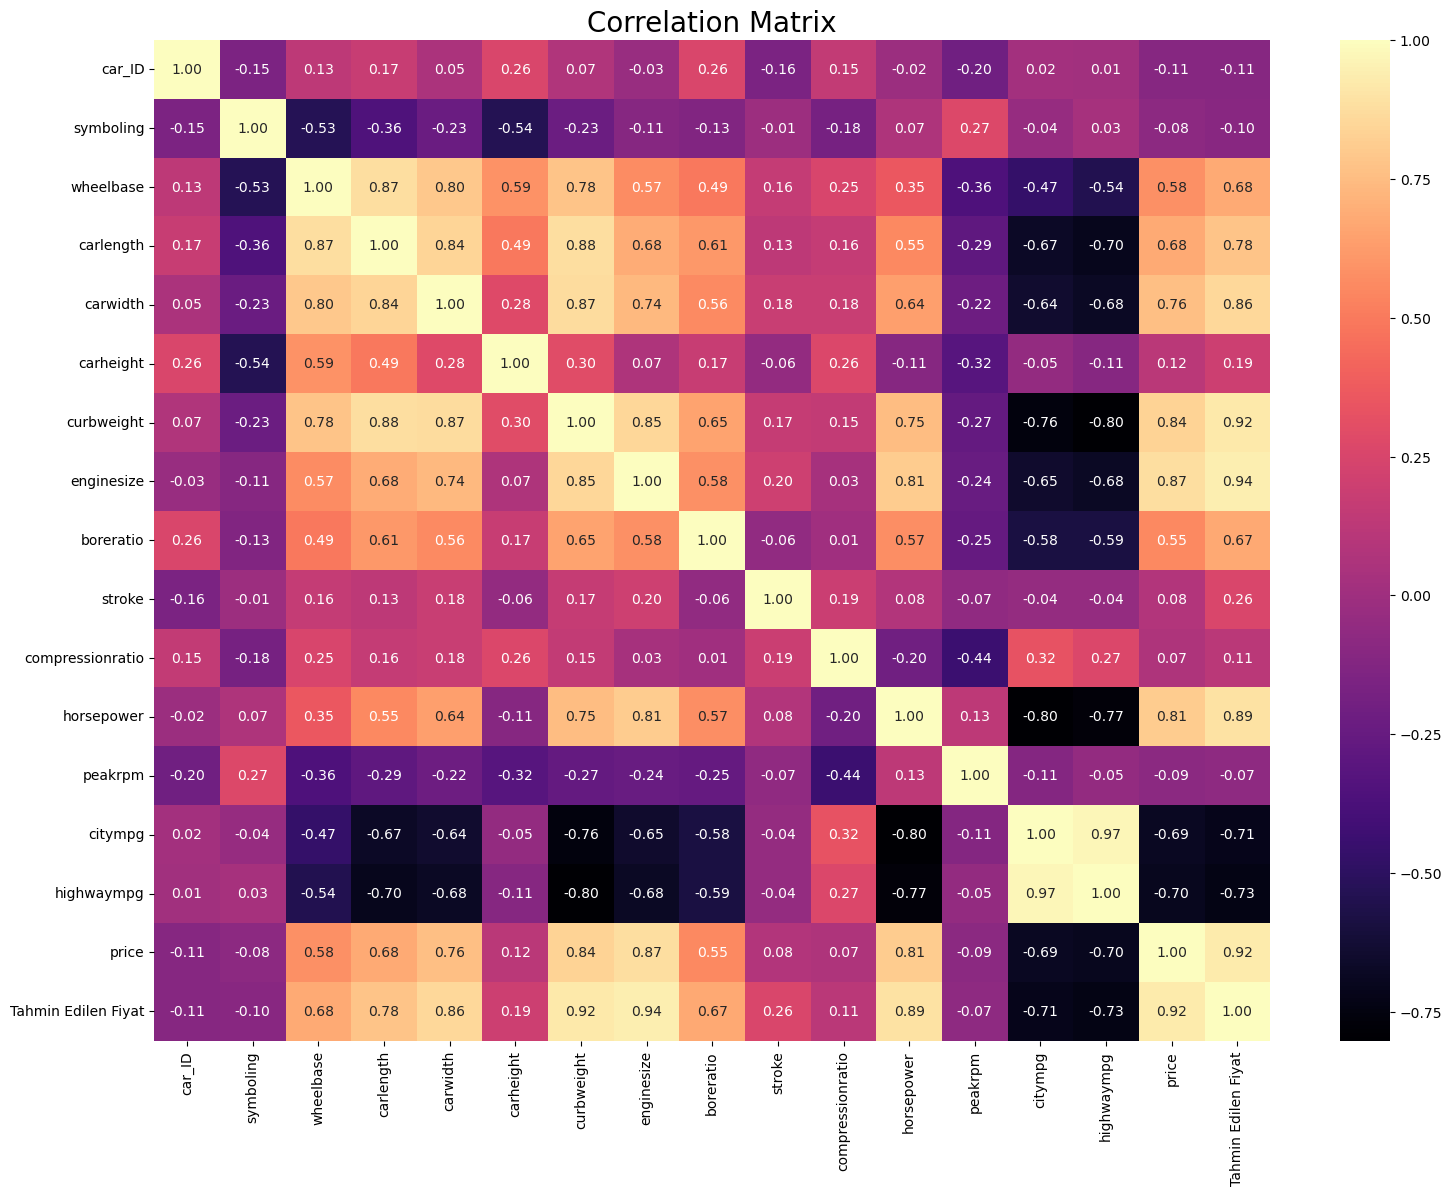

In [126]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(dff.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Aykırı Değer Analizi Yapılır

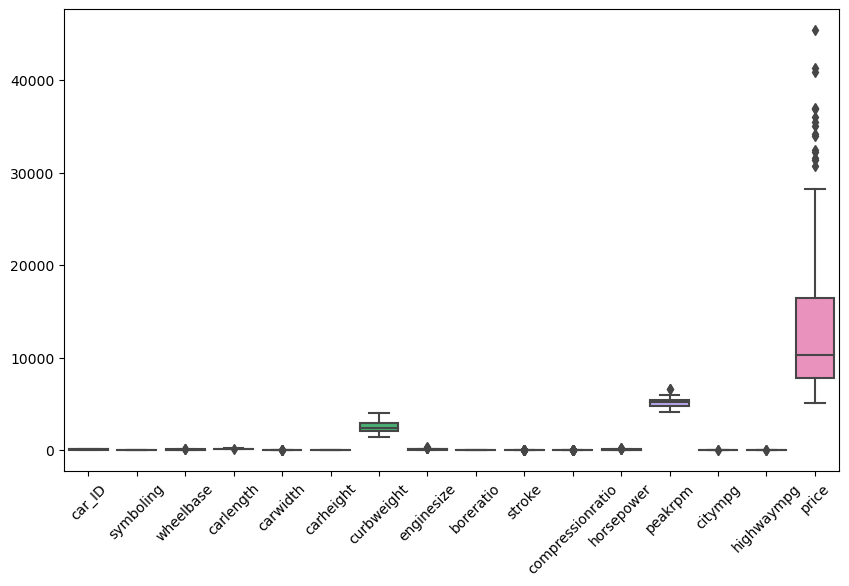

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dff)
plt.xticks(rotation=45)  # Sütun isimlerini döndürmek için
plt.show()

In [20]:
dff_price=dff["price"]
dff_price.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [21]:
dff["price"].describe().T

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

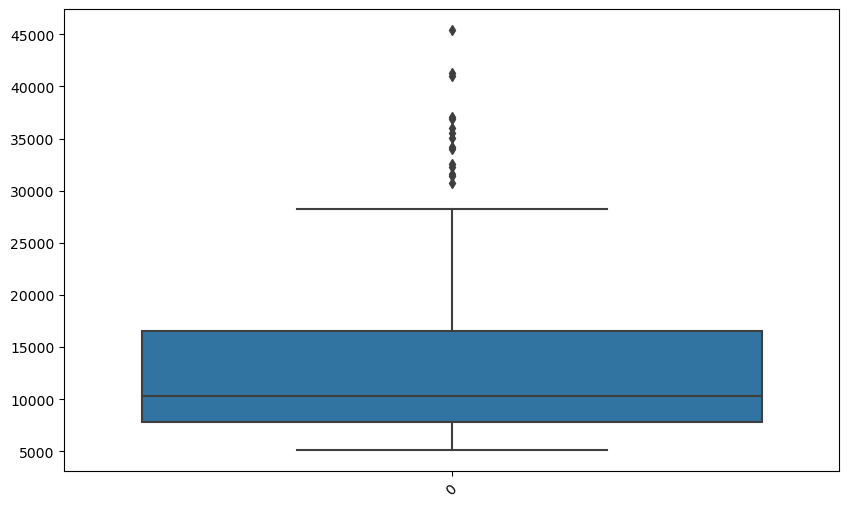

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dff_price)
plt.xticks(rotation=45)  # Sütun isimlerini döndürmek için
plt.show()

## Aykırı Değerler Tespit Edilir

In [23]:
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Aykırı değerleri bulma 
outliers_price = find_outliers(dff['price'])
print("Price sütunundaki aykırı değerler:")
print(outliers_price)

Price sütunundaki aykırı değerler:
15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64


count       15.000000
mean     35662.633333
std       4172.232404
min      30760.000000
25%      32389.000000
50%      35056.000000
75%      36954.000000
max      45400.000000
Name: price, dtype: float64

In [25]:
outlier_indexes = outliers_price.index

In [26]:
outliers = dff.loc[outlier_indexes]

In [27]:
outliers_brands = outliers[['CarName',"price"]].sort_values(by="price",ascending=False)
outliers_brands

,CarName,price
74,buick regal sport coupe (turbo),45400.0
16,bmw x5,41315.0
73,buick century special,40960.0
128,porsche boxter,37028.0
17,bmw x3,36880.0
49,jaguar xk,36000.0
48,jaguar xf,35550.0
72,buick skylark,35056.0
71,buick opel isuzu deluxe,34184.0
127,porsche cayenne,34028.0


In [28]:
dff.shape

(205, 26)

# Keşifsel Veri Analizi(EDA)

### En Çok Kullanılan Yakıt Türü

Text(0.5, 1.0, 'show which more using Fuel Type ')

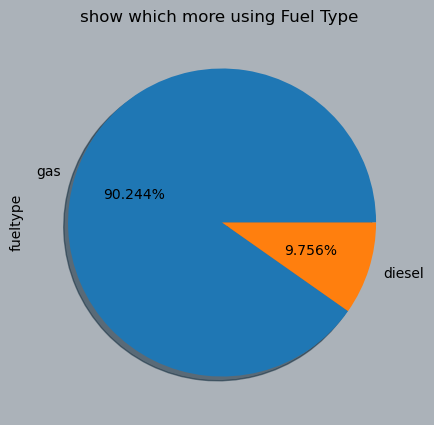

In [81]:
plt.figure(figsize = [5, 5], clear = True, facecolor = "#ABB2B9")
dff["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("show which more using Fuel Type ")

### Yakıt Türüne Göre Ortalama Araç Fiyatı

In [82]:
ftp_price=dff.groupby("fueltype")["price"].mean()
ftp_price

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<Axes: xlabel='fueltype'>

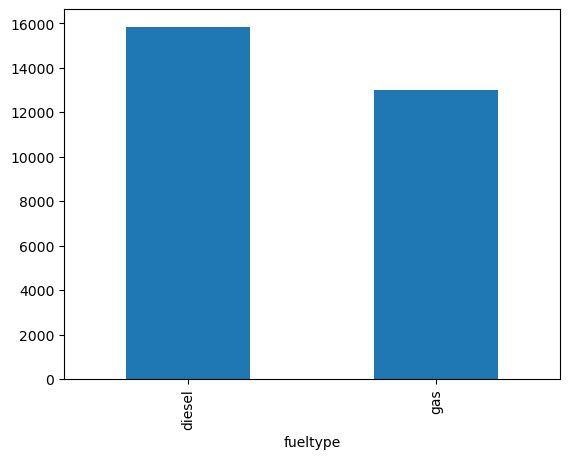

In [66]:
ftp_price.plot(kind="bar")

* Most using car working in Gas around 90 % and the average price less than the car working in Diesel.
    *[tr] En çok kullanılan araba %90 oranında gaz yakıt tipinde ve ortalama fiyatı dizel araçlardan az.

###  En çok tekrarlayan aspritation hangisi. Standrd mı Turbo mu?

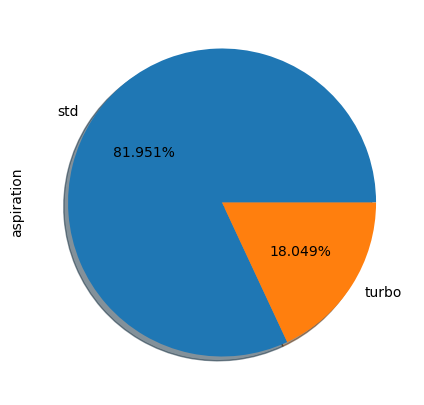

In [83]:
# Which is most Aspiration repeats in the Dataset [ car Standard or car Turbo ]


plt.figure(figsize = [5, 5], clear = True, facecolor = "#ffffff")
dff["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [84]:
# Average price depends on Standard or Turbo

S_P_P = dff.groupby("aspiration")["price"].mean()
S_P_P

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<Axes: xlabel='aspiration'>

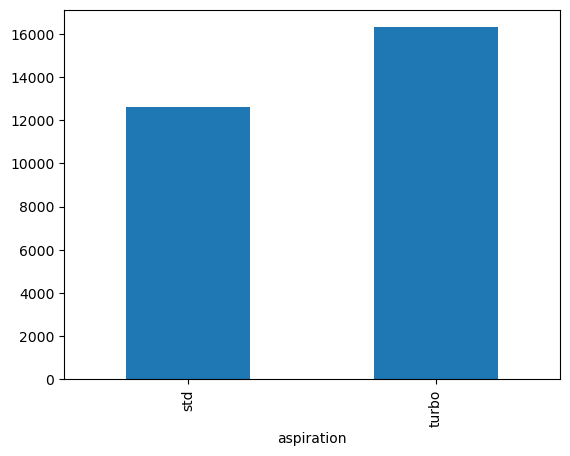

In [85]:
S_P_P.plot(kind="bar")

* Most cars Stander around 82% also the average price less Turbo, the percentage turbo car around 18 %.
* [tr] Araçların %82 si standar tipli ayrıca ortalama fiyat Turbodan düşük, Turbonun kullanım yüzdesi %18

### En çok tekrarlayan Kapı Sayısı

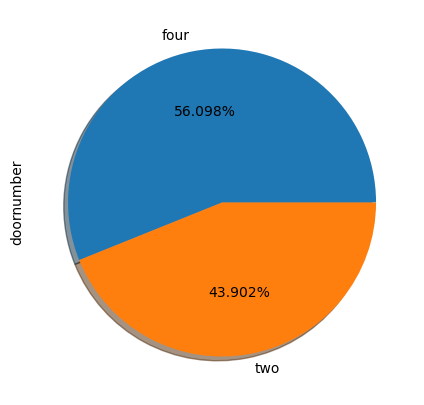

In [86]:
# Which is most Door Number repeats in the Dataset [2 or 4]

plt.figure(figsize = [5, 5], clear = True, facecolor = "#ffffff")
dff["doornumber"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [87]:
DP = dff.groupby("doornumber")["price"].mean()
DP

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

<Axes: xlabel='doornumber'>

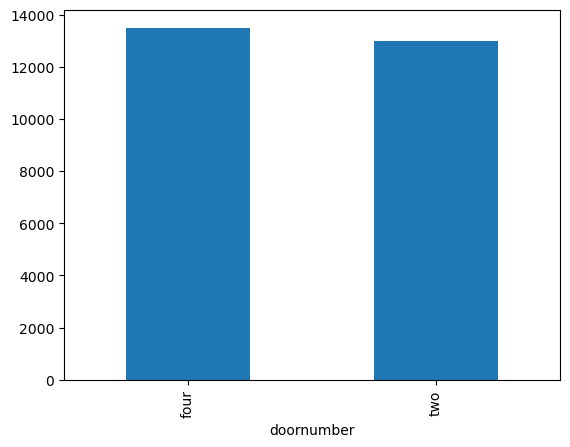

In [88]:
DP.plot(kind="bar")

* around 56 % using car has 4 doors and 46% using car has 2 doors, sports car also the same average price.
* [tr] dört kapılı kullanlar %56 iken iki kapılı kullanıcılar %46, spor arabalar aynı ortlama fiyata sahip

### En çok tekrar eden araba yapısı

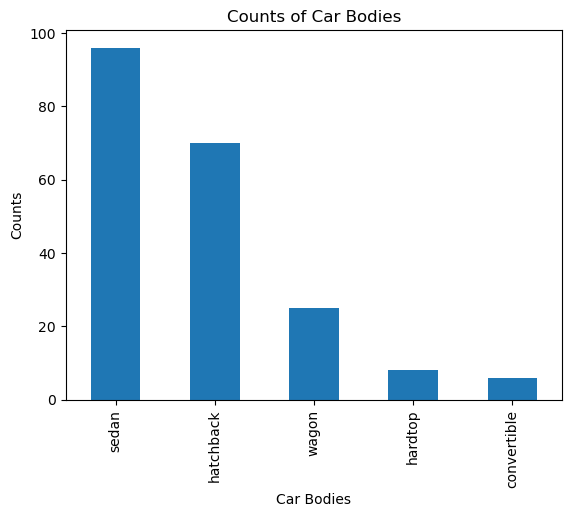

In [104]:
# Which is most Car Body repeats in the Dataset 

value_counts = df["carbody"].value_counts()
value_counts.plot(kind="bar")
plt.xlabel("Car Bodies")
plt.ylabel("Counts")
plt.title("Counts of Car Bodies")
plt.show()

In [94]:
# the average price depends on the car body

DP = df.groupby("carbody")["price"].mean()
DP

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

<Axes: xlabel='carbody'>

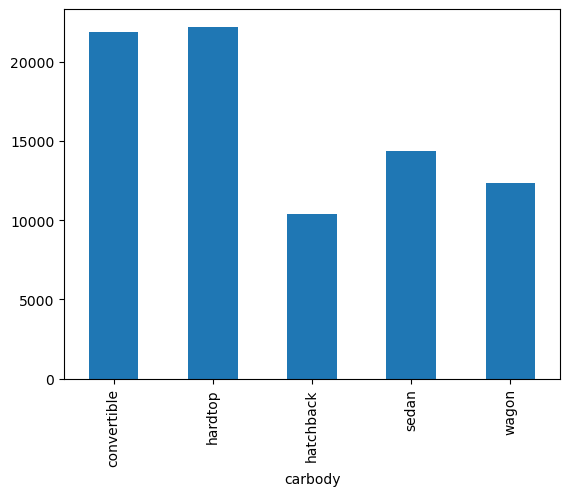

In [95]:
DP.plot(kind="bar")

* Most people using the cars type Sedan, also the high price types Convertible and Hardtop
* [tr] En çok kullanılan sedan, en pahalı olanlar Convertible,Hardtop

### En çok tekrar eden çeker tekerlek

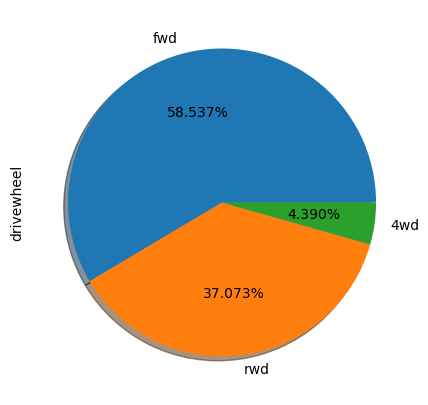

In [97]:
# Which is most Car Drive Wheel repeats in the Dataset 

plt.figure(figsize = [5, 5], clear = True, facecolor = "#ffffff")
dff["drivewheel"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [98]:
# the average price depend on the Drive Wheel

DwP = dff.groupby("drivewheel")["price"].mean()
DwP

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

<Axes: xlabel='drivewheel'>

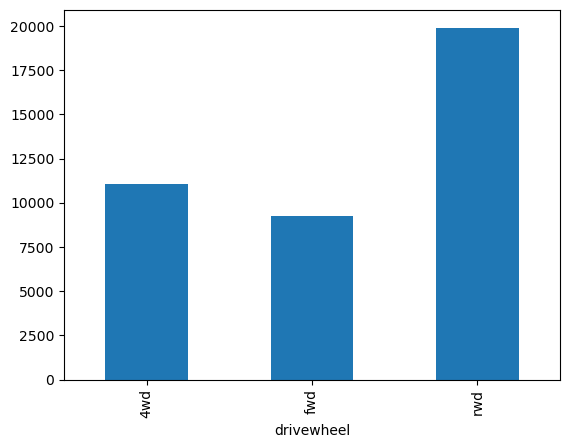

In [99]:
# create graph

DwP.plot(kind="bar")

* Most people using type [Drive Wheel ]> fwd , I thing because less price
* [tr] En çok fwd kullanılıyor bence fiyatındna dolayı.

### En çok tekrar eden Motor Tipi

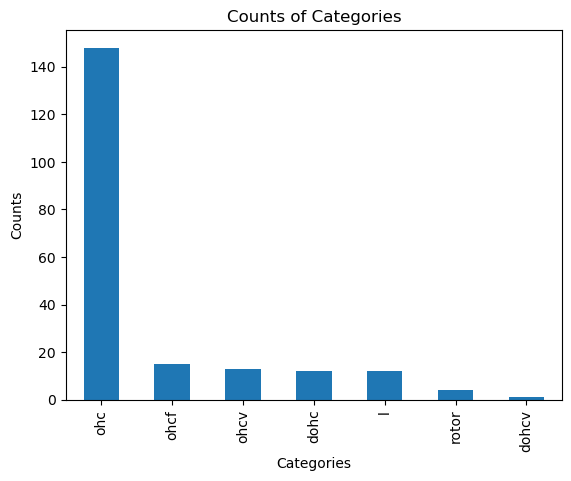

In [113]:
# Which is most Engine Type repeats in the Dataset 
etCount= df["enginetype"].value_counts()
etCount.plot(kind="bar")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Counts of Categories")
plt.show()


In [105]:
# the average price [ engine type]

ETP = dff.groupby("enginetype")["price"].mean()
ETP=ETP.sort_values()
ETP

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64

<Axes: xlabel='enginetype'>

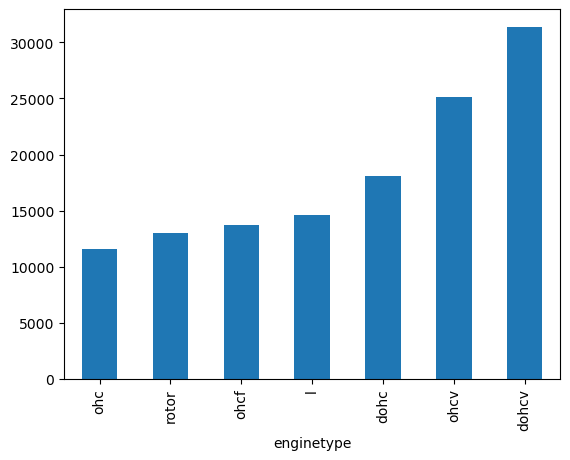

In [115]:
#create graph

ETP.plot(kind="bar")

* he most using engine type "ohc" and fewer prices
* [tr] En ucuz olan ve en çok kullanılan motor tipi ohc

### En çok tekrar eden silindir sayısı tipi

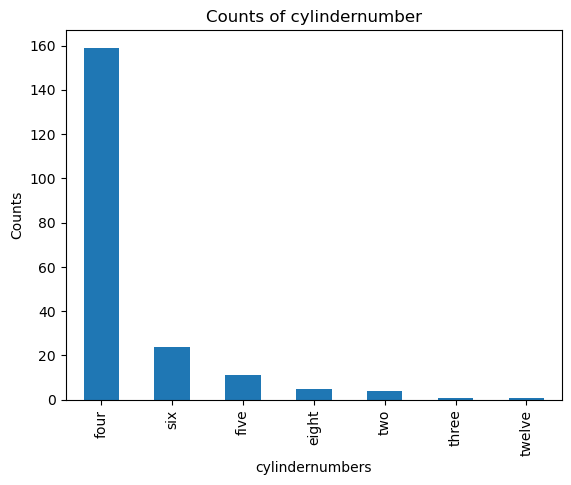

In [114]:
# Which is most Cylinder Number repeats in the Dataset 
etCount = df["cylindernumber"].value_counts()
etCount .plot(kind="bar")
plt.xlabel("cylindernumbers")
plt.ylabel("Counts")
plt.title("Counts of cylindernumber")
plt.show()



### Silindir Sayısına bağlı ortalama fiyat

In [107]:
# the average price depends on the cylinder number

CP = df.groupby("cylindernumber")["price"].mean()
CP=CP.sort_values()
CP

cylindernumber
three      5151.000000
four      10285.754717
two       13020.000000
five      21630.469727
six       23671.833333
twelve    36000.000000
eight     37400.100000
Name: price, dtype: float64

<Axes: xlabel='cylindernumber'>

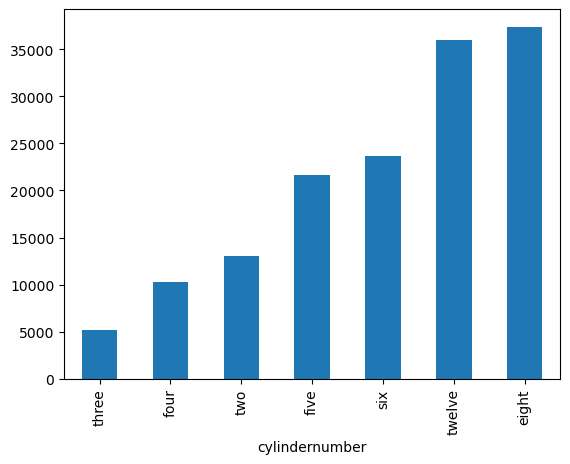

In [108]:
# create graph 

CP.plot(kind="bar")

* When increasing cylinder number the price increasing, but most people using the car has 4 cylinders.
* [tr] Silindir sayısı arttıkça fiya artmaktadır ama dört silindir kullanan sayısı daha fazladır.

### Motor Hacmi ve Fiyat Arasındaki İlişki

Text(0, 0.5, 'The Price')

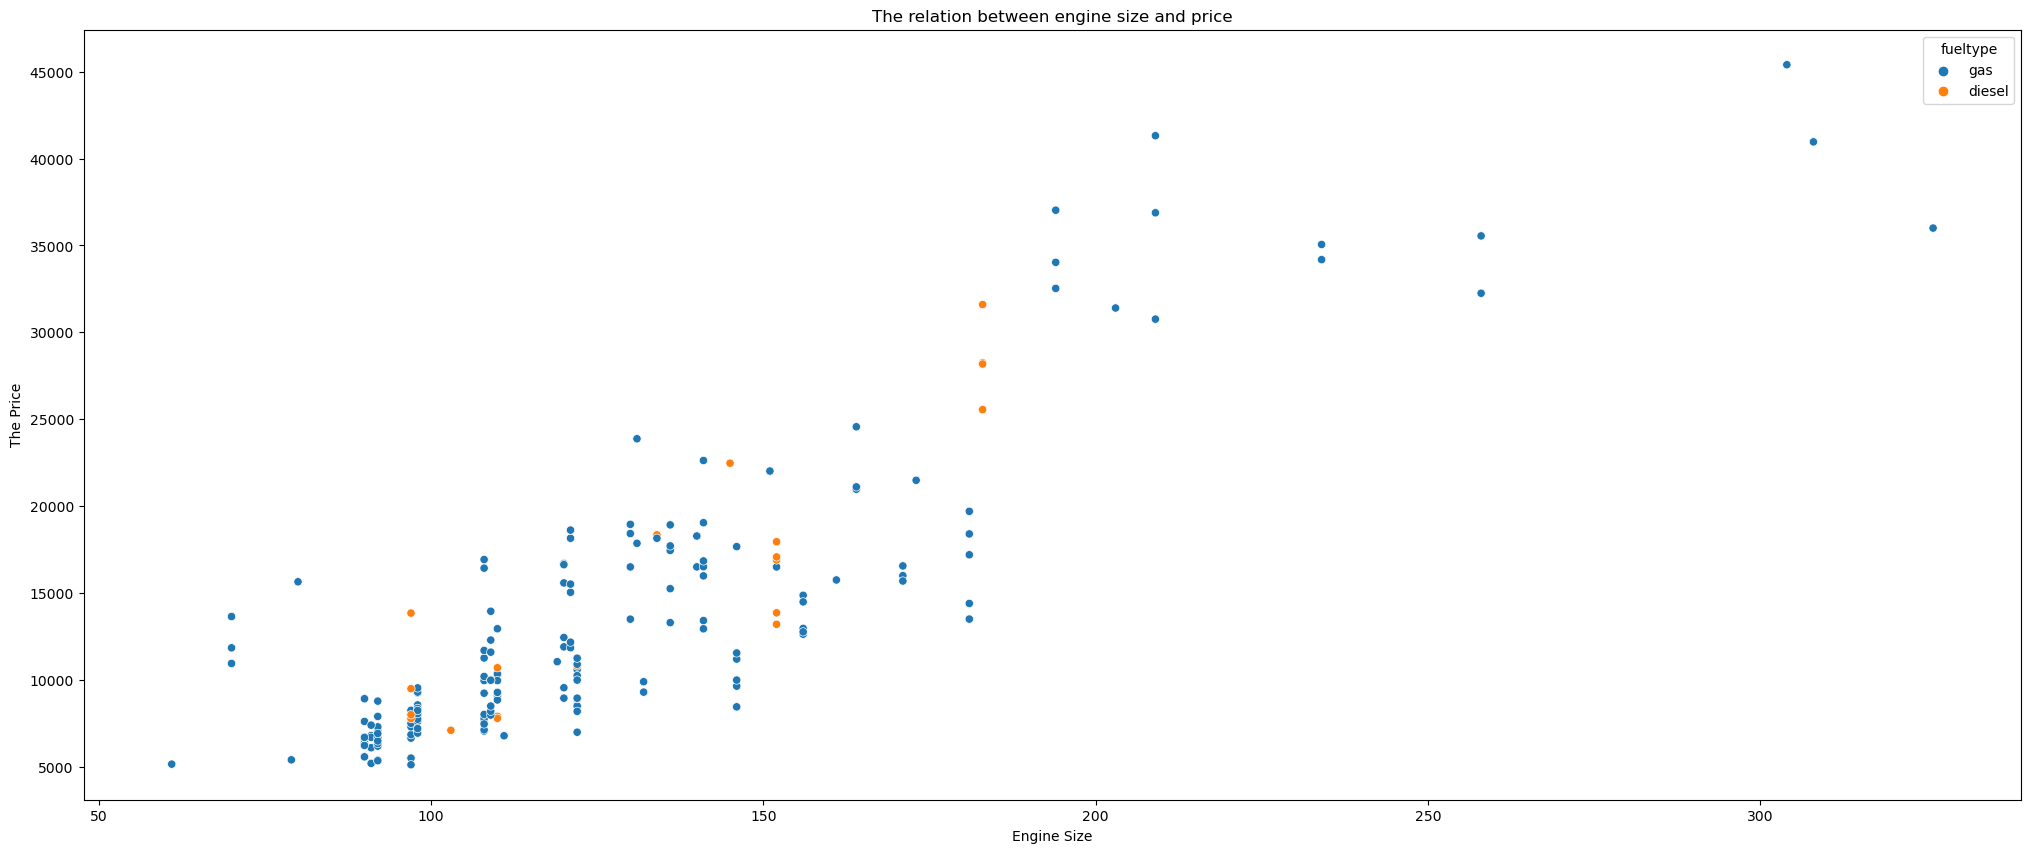

In [110]:
# to show the relation between engine size and price 

plt.figure(figsize=(25,10))
sns.scatterplot(data=dff,x="enginesize",y="price",hue="fueltype",markers=True)
plt.title("The relation between engine size and price")
plt.xlabel("Engine Size")
plt.ylabel("The Price")

* When incresing engine size the price will incresing.
* [tr] motor hacmi büyüdükçe fiyat artıyor.

### Bazı araç özellikleri ile fiyat arasındaki ilişki analizi

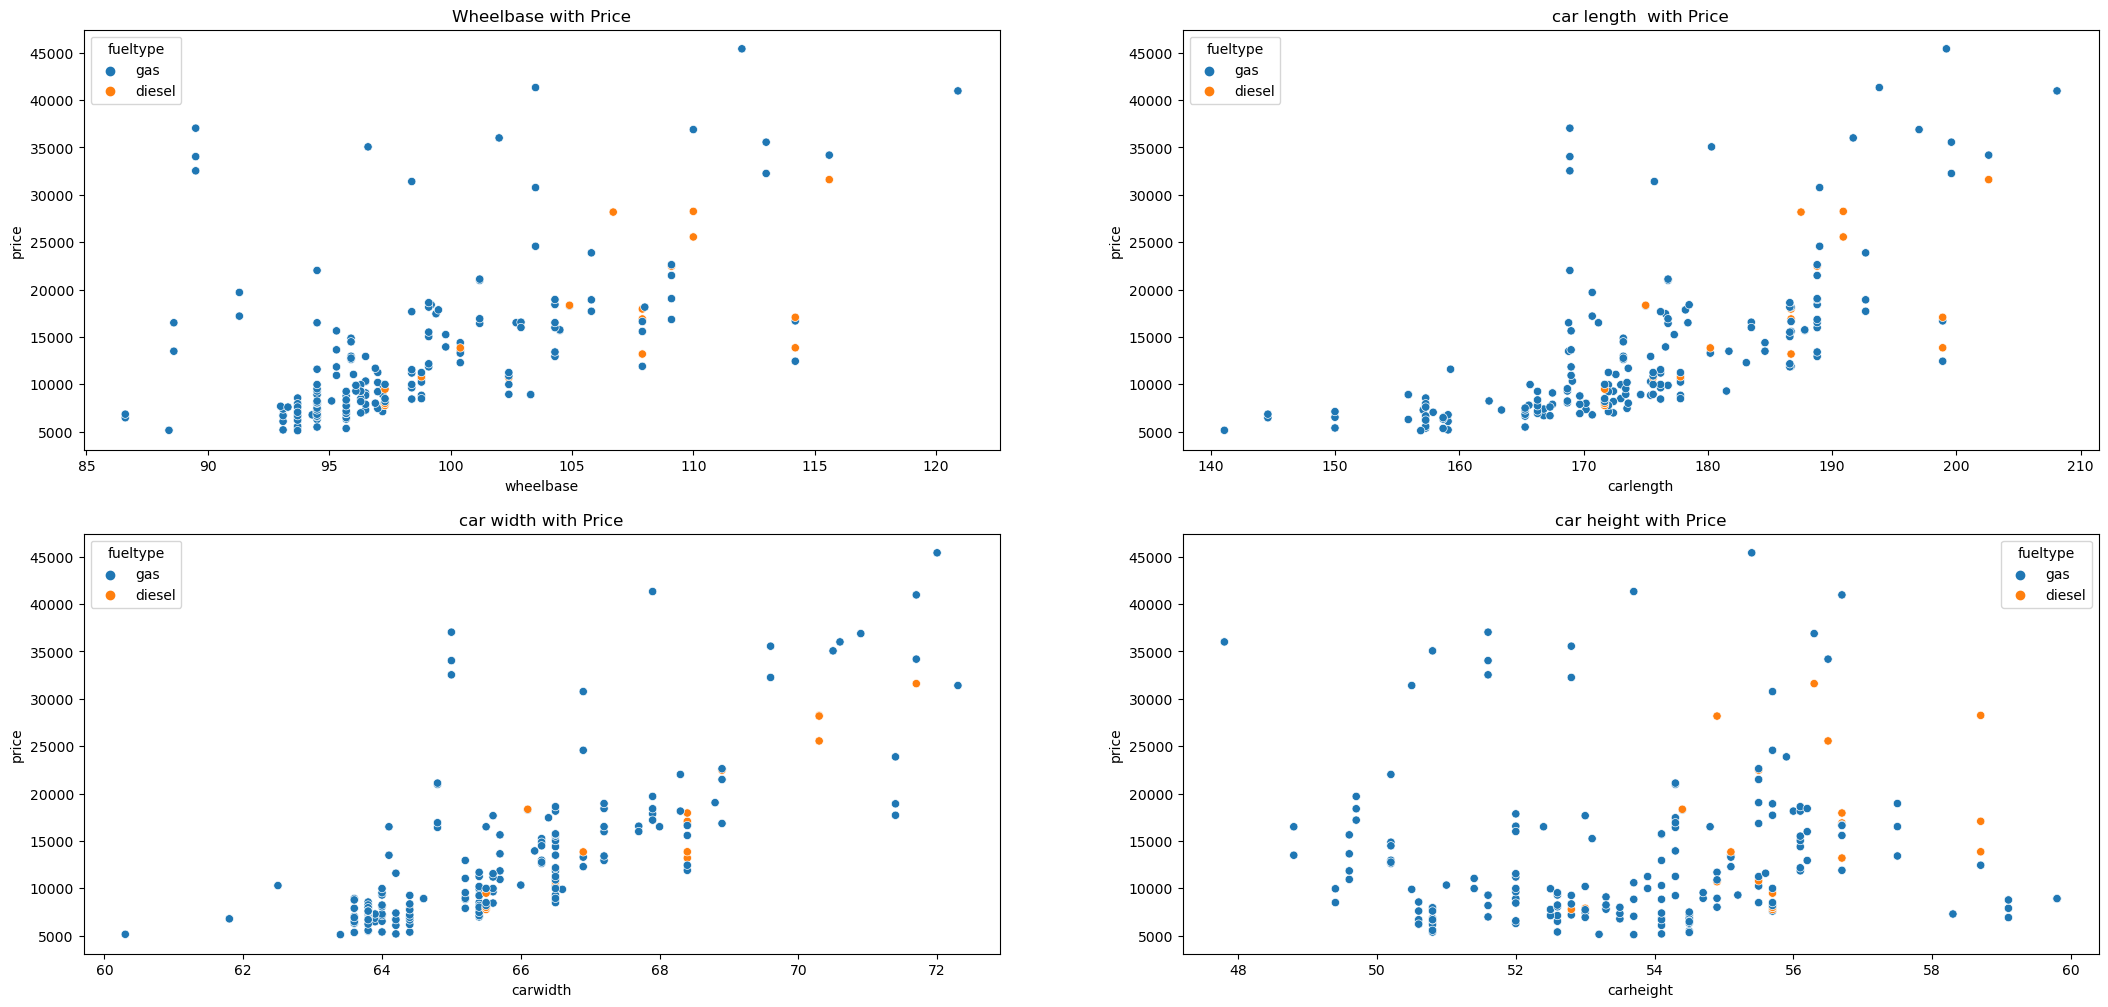

In [112]:
# this some graphs to showing the wheelbase , car length, car width, car height if have any affect in price


fig = plt.figure(figsize=(26, 12))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=dff,x="wheelbase",y="price",hue="fueltype",markers=True)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=dff,x="carlength",y="price",hue="fueltype",markers=True)

ax3 = fig.add_subplot(223)
sns.scatterplot(data=dff,x="carwidth",y="price",hue="fueltype",markers=True)


ax4 = fig.add_subplot(224)
sns.scatterplot(data=dff,x="carheight",y="price",hue="fueltype",markers=True)



ax1.title.set_text('Wheelbase with Price')
ax2.title.set_text('car length  with Price')
ax3.title.set_text('car width with Price')
ax4.title.set_text('car height with Price')
plt.show()

* The wheelbase, car length and car width have effect in price, but the Car height don't have any effect.
* [tr] Dingil uzaklığı araç genişlikfiyatı doğru etkilerken, araç uzunluğu etkilememektedir.

## Veri Önişleme Makine Öğrenmesi Aşamasında da Devam Edecektir..

# Makine Öğrenmesi(ML)

In [29]:
df=dff.copy()

In [30]:
df.drop(columns="car_ID",inplace=True)

In [31]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Sütunlar Kategorik ve Sayısal Olarak Ayrılır, Object Veri Tipinde Olanlar Cat Dizisine Aktarılırken Kalanlar num Dizisine Aktarılır.

In [32]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # sadece sayısal tipli yeni df
data_c=df[cat]  #  sadece kategorik tipli yeni df

In [33]:
col=data_c.columns
col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

## Kategorik Sütunların İçinde Gezip Tüm Sütunları LabelEncoder Fonksiyonuna Maruz Bırakırız. 

In [34]:
label_encoders = {}
categorical_columns = data_c.columns 
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

C:\Users\Uveys\AppData\Local\Temp\ipykernel_7624\1922108094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])
C:\Users\Uveys\AppData\Local\Temp\ipykernel_7624\1922108094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])
C:\Users\Uveys\AppData\Local\Temp\ipykernel_7624\1922108094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## Kategorik ve Numeric Olarak Ayırdığımız Dizileri Artık Birleştirme Zamanı Geldi

In [35]:
frames=[data_c,data_n]
df1=pd.concat(frames,axis=1)
df1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   enginetype        205 non-null    int32  
 8   cylindernumber    205 non-null    int32  
 9   fuelsystem        205 non-null    int32  
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

## Fiyat Değişkeninin Diğer Bağımsız Değişkenelr İle Corelasyon İlişkisini Azdan Çoğa Sıralarız

In [37]:
df1.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [38]:
df1=df1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]

df1.head()
# korelasyondan dolayı bu sütunları alıyorum

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


## Standardscalerd'dan Önce

In [39]:
#veriyi eğitim ve test olarak bölüm X ve y değişkenlerini tanımlıyoruz
X = df1.drop(columns="price")           
y = df1["price"]    # y = price

# eğitim ve test olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 13)
X Test  :  (62, 13)
Y Train :  (143,)
Y Test  :  (62,)


### Statsmodel

In [40]:
lm=sm.OLS(y_train,X_train)

In [41]:
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              282.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                    1.76e-88
Time:                        00:50:07   Log-Likelihood:                         -1341.4
No. Observations:                 143   AIC:                                      2709.
Df Residuals:                     130   BIC:                                      2747.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
highwaympg      -130.8802    176.734     -0.741      0.460    -480.528     218.768
citympg          -26.7579    195.177     -0.137      0.891    -412.891     359.376
CarName          -19.7999      7.175     -2.760      0.007     -33.994      -5.606
enginelocation  1.217e+04   2428.536      5.010      0.000    7362.958     1.7e+04
fuelsystem        66.4025    191.690      0.346      0.730    -312.833     445.638
boreratio      -2255.9516   1295.287     -1.742      0.084   -4818.521     306.618
wheelbase         61.9689    109.778      0.564      0.573    -155.214     279.152
drivewheel      1024.1320    625.639      1.637      0.104    -213.620    2261.884
carlength        -53.7406     61.301     -0.877      0.382    -175.018      67.537
carwidth          63.8658    166.634      0.383      0.702    -265.800     393.532
horsepower        21.8251     16.368      1.333      0.185     -10.556      54.206
curbweight         5.1225      1.727      2.966      0.004       1.705       8.540
enginesize        69.7894     14.520      4.807      0.000      41.064      98.515
==============================================================================
Omnibus:                        3.993   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.106
Skew:                           0.199   Prob(JB):                        0.128
Kurtosis:                       3.729   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Manuel Makine Öğrenmesi

In [42]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [122]:
# Oluşturulan modelin katsayılarına erişelim
coefficients = model.coef_

# Katsayıları ve onların hangi özelliklere (sütunlara) karşılık geldiğini görelim
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

highwaympg: -93.1889623433335
citympg: 60.455513639388755
CarName: -22.049322789417534
enginelocation: 13953.25419142799
fuelsystem: 111.0928524262803
boreratio: -994.6614759786414
wheelbase: 36.16570264331695
drivewheel: 1147.9274067031265
carlength: -34.3715406807137
carwidth: 1021.2242345534776
horsepower: 24.44830165458339
curbweight: 2.6987194521269253
enginesize: 62.2653506145563


* Negative (Negatif) Katsayılar: Bu değerler, ilişkili özelliğin artan birimlerine karşılık fiyatın azalacağını gösterir. Örneğin, "boreratio" özelliği için -994.66 değeri, bu oranın artmasıyla fiyatın düşeceğini işaret eder.

* Positive (Pozitif) Katsayılar: Bu değerler, ilişkili özelliğin artan birimlerine karşılık fiyatın artacağını gösterir. Örneğin, "carwidth" özelliği için 1021.22 değeri, aracın genişliğinin artmasıyla fiyatın artacağını belirtir.

* Büyük Değerli Katsayılar: Özelliklerin fiyat üzerindeki büyük etkilerini gösterir. Örneğin, "enginelocation" ve "drivewheel" gibi özellikler, büyük pozitif katsayılara sahiptir ve bu özelliklerin fiyat üzerinde belirgin bir etkisi olduğunu işaret eder.

* Küçük Değerli Katsayılar: Özelliklerin fiyat üzerindeki etkileri daha düşüktür. Örneğin, "carlength" ve "curbweight" gibi özelliklerin fiyat üzerinde daha az belirleyici olduğunu gösterir.

In [43]:
model.intercept_#  diğer tüm özelliklerin sıfır olduğu durumda beklenen fiyat değeridir.

-64776.82371567256

In [45]:
accuracyTable=pd.DataFrame({"gercek_y":y,"tahmin_y":model.predict(X)})
accuracyTable

,gercek_y,tahmin_y
0,13495.0,13879.818046
1,16500.0,13857.768723
2,16500.0,19383.790280
3,13950.0,13052.588723
4,17450.0,15768.437938
...,...,...
200,16845.0,17382.826668
201,19045.0,18726.896062
202,21485.0,20366.757303
203,22470.0,18903.573478


In [46]:
accuracyTable["hata"]=accuracyTable["gercek_y"]-accuracyTable["tahmin_y"]
accuracyTable

,gercek_y,tahmin_y,hata
0,13495.0,13879.818046,-384.818046
1,16500.0,13857.768723,2642.231277
2,16500.0,19383.790280,-2883.790280
3,13950.0,13052.588723,897.411277
4,17450.0,15768.437938,1681.562062
...,...,...,...
200,16845.0,17382.826668,-537.826668
201,19045.0,18726.896062,318.103938
202,21485.0,20366.757303,1118.242697
203,22470.0,18903.573478,3566.426522


In [47]:
accuracyTable["hata_kare"]=accuracyTable["hata"]**2
accuracyTable

,gercek_y,tahmin_y,hata,hata_kare
0,13495.0,13879.818046,-384.818046,1.480849e+05
1,16500.0,13857.768723,2642.231277,6.981386e+06
2,16500.0,19383.790280,-2883.790280,8.316246e+06
3,13950.0,13052.588723,897.411277,8.053470e+05
4,17450.0,15768.437938,1681.562062,2.827651e+06
...,...,...,...,...
200,16845.0,17382.826668,-537.826668,2.892575e+05
201,19045.0,18726.896062,318.103938,1.011901e+05
202,21485.0,20366.757303,1118.242697,1.250467e+06
203,22470.0,18903.573478,3566.426522,1.271940e+07


In [49]:
accuracyTable["hata_kare"].mean()

7770897.504008503

In [50]:
np.sqrt(np.mean(accuracyTable["hata_kare"]))

2787.632957189397

Karekök alınmış hata değeri olan RMSE, birimin aynı olduğu gerçek veri setiyle uyumlu bir ölçüdür ve modelin genelleme yeteneğini değerlendirmek için kullanılabilir. Daha düşük RMSE değerleri, modelin eğitim setine daha iyi uymasını ve daha iyi tahminler yapmasını ifade eder. 

In [51]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

2589.5067516146514

In [52]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

3198.137114865234

In [124]:
model.score(X_train,y_train)# r^2 değeridir. değer 1'e ne kadar yakınsa o kadar iyidir. train ve test değerleri ayrı ayrı incelenmelidir.

0.8899821602159971

In [125]:
model.score(X_test, y_test)

0.8523753664175361

In [54]:
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("Eğitim Seti - RMSE:", train_rmse)
print("Eğitim Seti - R^2 Skoru:", train_r2)

# Test verisi üzerinde model performansını değerlendirelim
y_test_pred = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Seti - RMSE:", test_rmse)
print("Test Seti - R^2 Skoru:", test_r2)

Eğitim Seti - RMSE: 2589.5067516146514
Eğitim Seti - R^2 Skoru: 0.8899821602159971

Test Seti - RMSE: 3198.137114865234
Test Seti - R^2 Skoru: 0.8523753664175361


In [55]:
#regresyon kütüphanesinden objeleri tanımlama

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [56]:
# Bir döngüde tüm regresyonları skorlama

li = [LR,DTR,RFR,KNR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 85.23753664175361
DecisionTreeRegressor() : 85.56318184062077
RandomForestRegressor() : 93.45759639679193
KNeighborsRegressor() : 76.12398013734366
KNeighborsRegressor() : 76.12398013734366
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 90.53662257648655


## Standardscaler'dan Sonra..

In [57]:
sc_df=df1.copy()

In [58]:
sc_df.head()

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [59]:
#A ve b olarak eğitim-test bölümü yapıyoruz
A = sc_df.drop(columns="price")           
b = sc_df["price"]    # y = price

Scaler= StandardScaler()
A=Scaler.fit_transform(A)
A

array([[-0.54605874, -0.64655303, -1.83822103, ...,  0.17448278,
        -0.01456628,  0.07444893],
       [-0.54605874, -0.64655303, -1.81377978, ...,  0.17448278,
        -0.01456628,  0.07444893],
       [-0.69162706, -0.95301169, -1.86266229, ...,  1.26453643,
         0.51488192,  0.60404617],
       ...,
       [-1.12833203, -1.10624102,  1.53467254, ...,  0.75753473,
         0.87875722,  1.10957081],
       [-0.54605874,  0.11959362,  1.58355505, ...,  0.04773235,
         1.27343679,  0.43553795],
       [-0.83719538, -0.95301169,  1.60799631, ...,  0.25053303,
         0.97502053,  0.33924755]])

In [60]:
# eğitim test olarak bölüyoruz
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(A, b, test_size=0.30, random_state=42)

print("X Train Scaler : ", X_train_s.shape)
print("X Test Scaler : ", X_test_s.shape)
print("Y Train Scaler : ", y_train_s.shape)
print("Y Test  Scaler : ", y_test_s.shape)

X Train Scaler :  (143, 13)
X Test Scaler :  (62, 13)
Y Train Scaler :  (143,)
Y Test  Scaler :  (62,)


In [61]:
li = [LR,DTR,RFR,KNR,KNR,XGB]
q = {}
for i in li:
    i.fit(X_train_s,y_train_s)
    ypred_s = i.predict(X_test_s)
    print(i,":",r2_score(y_test_s,ypred_s)*100)
    q.update({str(i):i.score(X_test_s,y_test_s)*100})

LinearRegression() : 85.23753664175347
DecisionTreeRegressor() : 84.69010901121538
RandomForestRegressor() : 94.3021866249352
KNeighborsRegressor() : 84.91365840631477
KNeighborsRegressor() : 84.91365840631477
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 90.53662257648655


## Eski veri setindeki price sütunun yanına bizim makineye tahmin ettirdiğimiz fiyatları içeren bir sütun ekleyeceğiz ve farkı gözlemleyeceğiz.

In [120]:
predPrice=model.predict(X_test)
dff["Tahmin Edilen Fiyat"] = pd.Series(predPrice, index=X_test.index)
dff.head(205)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Tahmin Edilen Fiyat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,NaN
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,NaN
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,20366.757303
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,NaN


In [121]:
dolu_satirlar = dff[dff["Tahmin Edilen Fiyat"].notnull()]
dolu_satirlar

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Tahmin Edilen Fiyat
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,15519.604884
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,18528.370663
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.000,24851.054004
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.000,26090.053438
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.000,-124.613483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,idi,3.01,3.40,23.0,52,4800,37,46,7775.000,6736.622375
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.000,13806.987788
194,195,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.000,15365.201318
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.000,15716.494414


# Sonuç

In [ ]:
Bu çalışmada hangi özelliğin fiyatı nasıl etkilediğinin analizini yaptık.Ve bu özelliklere göre araçların fiyatının ne olacağını tahmin ettik. Sonrasında bunu makineye yaptırdık.
Ve yüksek ilişki ve doğruluk skorları aldık.